Analysis:

1. Unsurpisingly, there is a correlation between temperature and latitude. The higher temperatures tend to cluster closer to latitude 0, while cities further away from the eqauator tend to drop off in temperature. 

2. There does not seem to be any correlation between a city's latitude and the humidity or cloudiness of said city.

3. While there does seem to be a weak correlation between latitude and wind speed, with the northern-most cities recording higher wind speeds, this can probably be dismissed as the result of a realtively small number of cities with higher than usual windspeed.

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
# set up lists to hold reponse info
name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print()
        

In [9]:
weather_dict = ({'Name': name, 'Latitude': latitude, 
                 "Longitude": longitude, 'Temperature': temperature, 
                 'Humidity': humidity, 'Cloudiness': cloudiness, 
                 'Wind Speed': wind_speed
                }
               )

In [24]:
weather_df = pd.DataFrame(weather_dict)
# weather_df.head()
weather_df.dropna
weather_df.head()

,Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Pevek,69.70,170.27,2.05,100,64,2.51
1,Ponta do Sol,-20.63,-46.00,28.75,63,56,2.26
2,Bethel,60.79,-161.76,6.10,92,90,3.10
3,Chokurdakh,70.62,147.90,-1.41,87,88,5.16
4,Jamestown,-33.21,138.60,8.65,75,92,3.36


In [36]:
sample_cities = weather_df.sample(500)
sample_cities = sample_cities.reset_index(drop=True)
sample_cities.count()

Name           500
Latitude       500
Longitude      500
Temperature    500
Humidity       500
Cloudiness     500
Wind Speed     500
dtype: int64

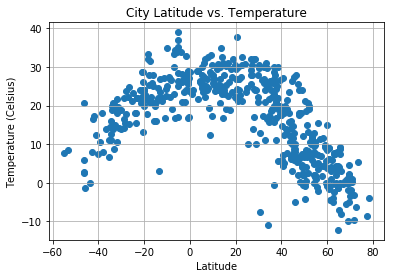

In [30]:
# Build a scatter plot for each data type
plt.scatter(sample_cities["Latitude"], sample_cities["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

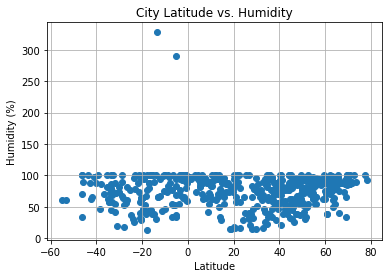

In [31]:
plt.scatter(sample_cities["Latitude"], sample_cities["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

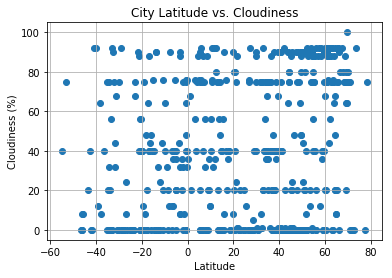

In [32]:
plt.scatter(sample_cities["Latitude"], sample_cities["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

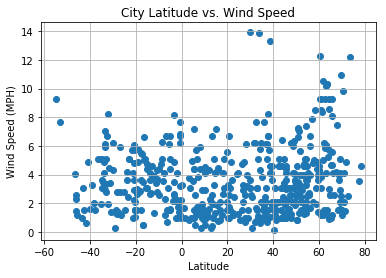

In [34]:
plt.scatter(sample_cities["Latitude"], sample_cities["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()